## Shrinkage Methods : L2 (Ridge) and L1 (Lasso) regularization for multivariate linear regression

Last week, you observed the effects of overfitting of given data because of high model complexity on "data_poly1.npz" and "data_poly2.npz". You saw how overfitting occured due to the least squares regression model describing random errors or noise in the data instead of the underlying distribution thus causing an increase in test error. (although the training error reduced with increasing complexity). This week we will explore the two main explanations of the overfitting phenomenon :
- High model complexity
- Multicollinearity of predictors

Then we will go on to look at the two most widely used techniques to reduce overfitting of data on using linear regression models: Ridge and Lasso regression.

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Overfitting of data due to high model complexity

#### Ridge regression
Last week you fit a $9$th order polynomial to the given dataset "data_poly1.npz" containing 10 distinct points. The polynomial fit all the data points exactly and thus wrongly modelled the noise too. 
- Now use polynomial regression of order 9 along with L2 norm regularization (Ridge regression) on "data_poly1.npz" for $\lambda=0, 0.1, 1, 10$ and $100$ and plot the true vs predicted values for each $\lambda$. 

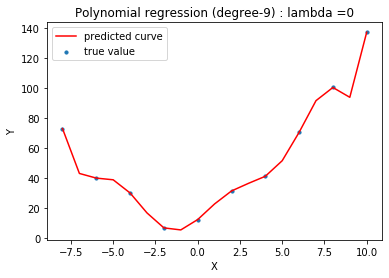

The mean squared error for lambda = 0 : 3.2650503436787163e-13


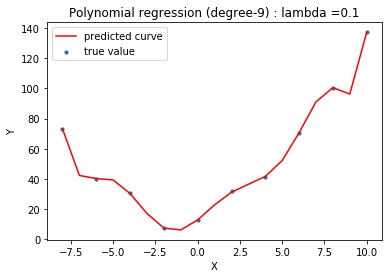

The mean squared error for lambda = 0.1 : 0.038719315994142856


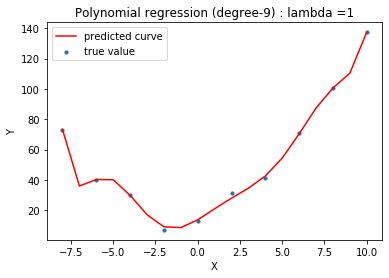

The mean squared error for lambda = 1 : 2.0428539572001885


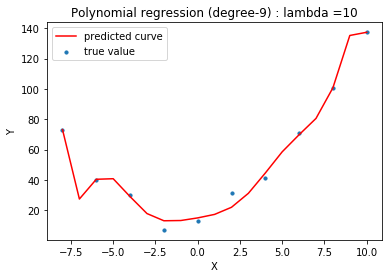

The mean squared error for lambda = 10 : 14.782136803414682


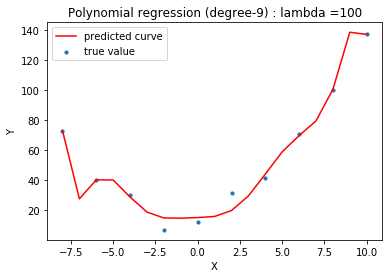

The mean squared error for lambda = 100 : 21.737736416593492


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# importing the data
data = np.load('data_poly1.npz')
X = data['x'].reshape(-1,1)
Y = data['y'].reshape(-1,1)

# creating new features and training the model
pol = PolynomialFeatures(degree = 9)
X_new = pol.fit_transform(X)

# plotting for various lambda values
X3 = np.arange(-8,11,1).reshape(-1,1)

lamda_range = [0,0.1,1,10,100]
for lamda in lamda_range:
    # fitting the model
    reg = Ridge(alpha = lamda)
    reg.fit(X_new, Y)
    
    # plotting
    plt.figure()
    plt.scatter(X,Y, s=10, label="true value")
    plt.plot(X3, reg.predict(pol.fit_transform(X3)), color = 'r', label= "predicted curve")
    plt.title('Polynomial regression (degree-9) : lambda ='+ str(lamda))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
    # reporting mse
    print("The mean squared error for lambda = "+str(lamda)+" :",mean_squared_error(Y,reg.predict(X_new)))

#### Lasso regression
- Now use polynomial regression of order 9 along with L1 norm regularization (Lasso regression) on "data_poly1.npz" for $\lambda=0, 0.1, 1, 10$ and $100$ and plot the true vs predicted values for each $\lambda$. 

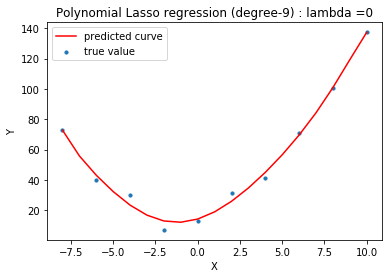

The mean squared error for lambda = 0 : 14.020586503739105


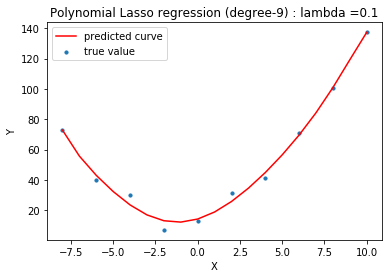

The mean squared error for lambda = 0.1 : 14.05407031838746


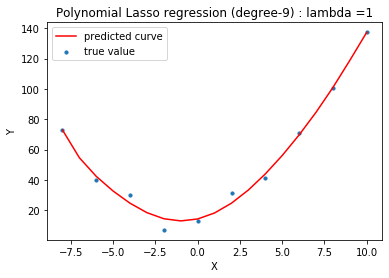

The mean squared error for lambda = 1 : 14.966124058540933


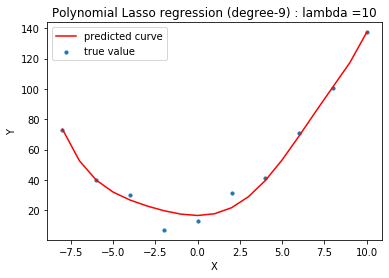

The mean squared error for lambda = 10 : 29.53436037059496


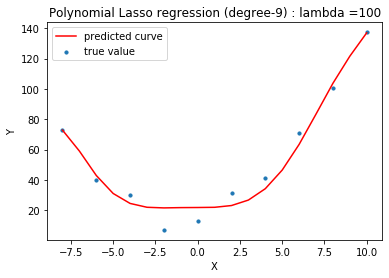

The mean squared error for lambda = 100 : 52.35939977969


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# importing the data
data = np.load('data_poly1.npz')
X = data['x'].reshape(-1,1)
Y = data['y'].reshape(-1,1)

# creating new features and training the model
pol = PolynomialFeatures(degree = 9)
X_new = pol.fit_transform(X)

# plotting for various lambda values
X3 = np.arange(-8,11,1).reshape(-1,1)

lamda_range = [0,0.1,1,10,100]
for lamda in lamda_range:
    # fitting the model
    reg = Lasso(alpha = lamda)
    reg.fit(X_new, Y)
    
    # plotting
    plt.figure()
    plt.scatter(X,Y, s=10, label="true value")
    plt.plot(X3, reg.predict(pol.fit_transform(X3)), color = 'r', label= "predicted curve")
    plt.title('Polynomial Lasso regression (degree-9) : lambda ='+ str(lamda))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
    # reporting mse
    print("The mean squared error for lambda = "+str(lamda)+" :",mean_squared_error(Y,reg.predict(X_new)))

Plot the training and validation set ("data_poly2.npz") mean square errors vs $\lambda$ for ridge and lasso regression. Compare with least squares polynomial regression of order $9$ from the previous week.  

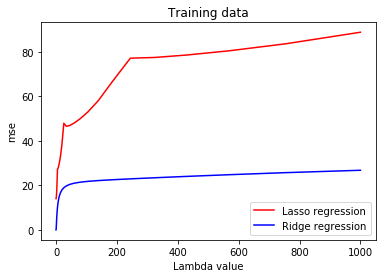

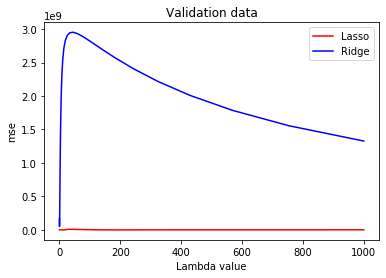

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# importing the training data
data = np.load('data_poly1.npz')
X_train = data['x'].reshape(-1,1)
Y_train = data['y'].reshape(-1,1)

# creating new features and training the model
pol = PolynomialFeatures(degree = 9)
X_new_train = pol.fit_transform(X_train)

# for validation
data_val = np.load("data_poly2.npz")
X_valid = data_val['x'].reshape(-1,1)
Y_valid = data_val['y'].reshape(-1,1)
X_new_val = pol.fit_transform(X_valid)

# plotting for various lambda values
X3 = np.arange(-8,11,1).reshape(-1,1)

lamda_range = np.logspace(-3,3,50)
lasso_train_mse = []
lasso_valid_mse = []
ridge_train_mse = []
ridge_valid_mse = []
for lamda in lamda_range:
    # fitting the lasso model
    Lasso_reg = Lasso(alpha = lamda)
    Lasso_reg.fit(X_new_train, Y_train)
    # appending mse for train data, lasso regression
    lasso_train_mse.append(mean_squared_error(Y_train,Lasso_reg.predict(X_new_train)))
    # appending mse for validation data, lasso regression
    lasso_valid_mse.append(mean_squared_error(Y_valid,Lasso_reg.predict(X_new_val)))
    
    # fitting the ridge model
    Ridge_reg = Ridge(alpha = lamda)
    Ridge_reg.fit(X_new_train, Y_train)
    # appending mse for train data, lasso regression
    ridge_train_mse.append(mean_squared_error(Y_train,Ridge_reg.predict(X_new_train)))
    # appending mse for validation data, lasso regression
    ridge_valid_mse.append(mean_squared_error(Y_valid,Ridge_reg.predict(X_new_val)))

# for training mse
plt.figure()
plt.plot(lamda_range,lasso_train_mse, label="Lasso regression", color = 'r')
plt.plot(lamda_range,ridge_train_mse, label="Ridge regression", color = 'b')

plt.legend()
plt.xlabel('Lambda value')
plt.ylabel('mse')
plt.title("Training data")
plt.show()

# for ridge regression
plt.figure()
plt.plot(lamda_range,lasso_valid_mse, label="Lasso", color = 'r')
plt.plot(lamda_range,ridge_valid_mse, label="Ridge", color = 'b')
plt.legend()
plt.xlabel('Lambda value')
plt.ylabel('mse')
plt.title("Validation data")
plt.show()



#### Observations and inferences:
- Explain how the variances of the least squares estimates vary as the number of features increase. Comment for the following three cases :
 - n>>p
 - n~p
 - n<p

n : number of data points <br>
p : number of features <br>
- Why do ridge and lasso regression improve over least squares regression? Make arguments based on the training and validation set error plots.
- What can you say about the model complexity as $\lambda$ increases?

1) for n >> p, we get a biased model so the variance in the least square estimates in low. For n ~ p and n < p, we may end up overfitting  and hence the variance in the least square estimates will be high.

2) Both ridge and lasso regression aim at reducing overfitting by penalizing large coefficients in the model.

3) By increasing lambda, we are further penalizing, and we can see that training error which was earlier very low due to overfitting starts to increase significantly as Lambda increases in both ridge and lasso case.

4) On the other hand, test error in ridge case increases and  decreases as lambda increases actually giving a threshold value of lambda to be used.In the lasso case, the test error increases and decreases(from the peak in the above figures) till it reaches a minimum and then with further increase in lambda, due to underfitting it again begins to rise.Hence, a threshold lambda can be choosen where the test error is minimum.

5) As lamda increases, model complexity decreases (as the weights tend to get smaller in the case of ridge and weights tend to become zero in the casae of lasso).

### Overfitting of data due to multicollinearity

The coefficient estimates of least squares regression can also change erratically in responses to small changes in data when the predictors are highly correlated. 

#### Uncorrelated features
The three columns of $X$ contain the three features. $Y$ is generated as a linear combination of two features as shown. 
- Compute the correlations between the features.
- Fit a linear regression, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model and compare the coefficients with the expected coefficients. 
- Does the linear regression model recover the underlying structure of the data? (despite significant noise in the data)
- How often do you think that real life datasets have uncorrelated features? 
- Which of the two methods (ridge and lasso regression) performs feature selection? Which model results in sparser weights?



In [10]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(0)
size = 5000
X = np.random.normal(0, 1, (size, 3))
#Y = X0 + 2*X1 + noise
#X0,X1 and X2 are the features
Y = X[:,0] + 2*X[:,1] + np.random.normal(0, 2, size)

# computing the correlations between the features
corr_matrix = np.corrcoef(X.T)
print("correlation between the features :\n")
print(corr_matrix)
print()

# fitting a linear regression
lr = LinearRegression()
lr.fit(X,Y)
print("The coefficients of linear regression model are :")
print(lr.coef_)
print()

# fitting a lasso(lambda = 0.1)
Lasso_reg = Lasso(alpha = 0.1)
Lasso_reg.fit(X,Y)
print("The coefficients of Lasso model are :")
print(Lasso_reg.coef_)
print()

# fitting a Ridge(lambda = 10)
Ridge_reg = Ridge(alpha = 10)
Ridge_reg.fit(X,Y)
print("The coefficients of Ridge regression model are :")
print(Ridge_reg.coef_)
print()

correlation between the features :

[[ 1.          0.01568331 -0.01206625]
 [ 0.01568331  1.          0.01373401]
 [-0.01206625  0.01373401  1.        ]]

The coefficients of linear regression model are :
[ 0.98422873  1.99522378 -0.04074316]

The coefficients of Lasso model are :
[ 0.88555304  1.89248636 -0.        ]

The coefficients of Ridge regression model are :
[ 0.98231412  1.99112131 -0.04062747]



1) Yes, the ordinary regression model more or less recover the underlying structure (Y as function of First two variables(X0, X1)) but it involves the third feature due to presence of noise. If we observe the coefficients of the variables they are close to the expected model.

2) It is possible to find nearly uncorrelated features along with many correlated features. 

3) Lasso Regression performs feature selection and results in sparser weights.

#### Correlated features
The three columns of $X$ contain three features. $Y$ is generated as a linear combination of the three features using 10 different random seeds as shown.
- Compute the correlations between the features.
- Fit a linear, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model corresponding to data generated from each random seed and compare the coefficients with the expected coefficients.
- Compare the stability of the three models. Here stability is wrt fluctuations in coefficients on minor changes in data achieved through a different random seed in each iteration.
- Do you expect lasso and ordinary linear regression models to be stable for datsets with correlated features? Explain giving reasons.

In [11]:
size = 100
 
#We run the method 10 times with different random seeds
for i in range(10):
    print("Random seed %s" % i)
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    #X0,X1 and X2 are the features
    X0 = X_seed + np.random.normal(0, .1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    Y = X0 + X1 + X2 + np.random.normal(0, 1, size)
    X = np.array([X0, X1, X2]).T
    
    # computing the correlations between the features
    corr_matrix = np.corrcoef(X.T)
    print("correlation between the features :\n")
    print(corr_matrix)
    print()

    # fitting a linear regression
    lr = LinearRegression()
    lr.fit(X,Y)
    print("The coefficients of linear regression model are :")
    print(lr.coef_)
    print()

    # fitting a lasso(lambda = 0.1)
    Lasso_reg = Lasso(alpha = 0.1)
    Lasso_reg.fit(X,Y)
    print("The coefficients of Lasso model are :")
    print(Lasso_reg.coef_)
    print()

    # fitting a Ridge(lambda = 10)
    Ridge_reg = Ridge(alpha = 10)
    Ridge_reg.fit(X,Y)
    print("The coefficients of Ridge regression model are :")
    print(Ridge_reg.coef_)
    print()

Random seed 0
correlation between the features :

[[1.         0.99107886 0.9914997 ]
 [0.99107886 1.         0.99254973]
 [0.9914997  0.99254973 1.        ]]

The coefficients of linear regression model are :
[ 0.7284403   2.30926001 -0.08219169]

The coefficients of Lasso model are :
[0.68342507 2.1773519  0.        ]

The coefficients of Ridge regression model are :
[0.93832131 1.05887277 0.87652644]

Random seed 1
correlation between the features :

[[1.         0.99061655 0.98680909]
 [0.99061655 1.         0.98560791]
 [0.98680909 0.98560791 1.        ]]

The coefficients of linear regression model are :
[ 1.15181561  2.36579916 -0.59900864]

The coefficients of Lasso model are :
[0.85351108 1.95094851 0.        ]

The coefficients of Ridge regression model are :
[0.98409577 1.06792673 0.75855367]

Random seed 2
correlation between the features :

[[1.         0.99079128 0.98962272]
 [0.99079128 1.         0.991474  ]
 [0.98962272 0.991474   1.        ]]

The coefficients of line

1) From the coefficients of simple, Ridge and Lasso regression models obtained above, Ridge Regression seems stable when there are minor changes in the data followed by linear regression and then Lasso Regresssion.

2) Lasso and Ordinary Linear Regression are not that stable and we don't expect it to be when the data has multiple correlated features.Since,Lasso Regression is usually for large datasets and does feature selection automatically. By increasing lamda, certain coefficents drop to zero very quickly, and this can be a problem when multiple features are correlated as in this case. On the other hand, Linear Regression treats all features equally, and this is not effective as correlated features often have similar effects and don't need to be treated individually.